In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dim = 3
points = [np.random.randn(dim) for _ in range(20)]
points.extend([np.random.randn(dim) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(dim) + np.array([10, 5, 0]) for _ in range(20)])

points = np.array(points)

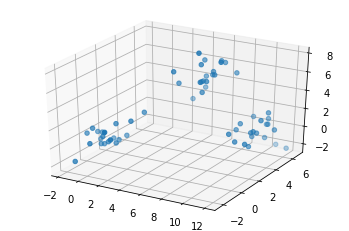

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(points[:,0], points[:,1], points[:,2])

In [ ]:
def euclidean_dist(a, b):
    return ((a - b) ** 2).sum() ** 0.5

In [ ]:
def kmeans(points, k, max_iters=10):
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]

    for iter in range(max_iters):
        labels = np.full(points.shape[0], -1)
        for pid, p in enumerate(points):
            min_dist = np.inf
            min_cid = -1
            for cid, c in enumerate(centroids):
                dist = euclidean_dist(p, c)
                if dist < min_dist:
                    min_dist = dist
                    min_cid = cid
            labels[pid] = min_cid
        new_centroids = np.zeros_like(centroids)
        counts = np.zeros(k, dtype=np.int32)

        for l, p in zip(labels, points):
            new_centroids[l] += p
            counts[l] += 1

        for i in range(k):
            new_centroids[i] /= counts[i]

        if np.array_equal (new_centroids, centroids):
            break
        else:
            centroids = new_centroids

    return labels, centroids

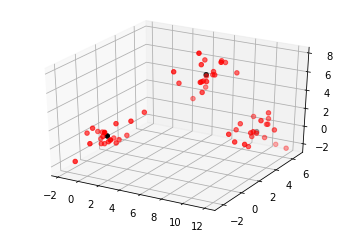

In [ ]:
labels, centroids = kmeans(points, 3)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2], c='red')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c='black')
plt.show()

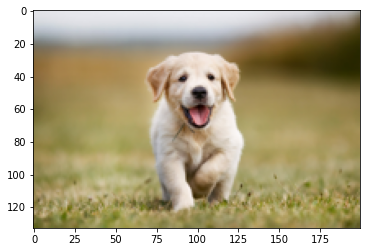

In [ ]:
from PIL import Image

img = Image.open("dog.jpeg")


width = 200
height = int(img.height * width / img.width)

img = img.resize((width, height))

plt.imshow(img)
plt.show()

pixels = np.array(img).reshape(-1, 3).astype(np.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


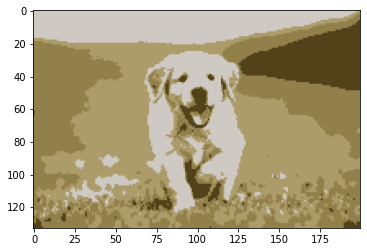

In [ ]:
labels, centroids = kmeans(pixels, 10)

for l, pid in zip(labels, range(pixels.shape[0])):
    pixels[pid] = centroids[l]

im_remastered = Image.fromarray(pixels.reshape((height, width, 3)).astype(np.int8), 'RGB')
plt.imshow(im_remastered)
plt.show()

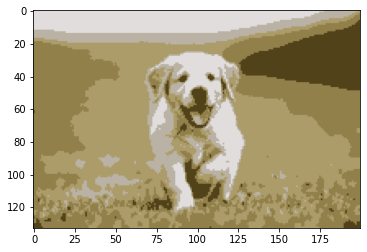

In [ ]:
kmeans_sk = KMeans(n_clusters=5).fit(pixels)

centroids, labels = kmeans_sk.cluster_centers_, kmeans_sk.labels_

for l, pid in zip(labels, range(pixels.shape[0])):
    pixels[pid] = centroids[l]

im_remastered = Image.fromarray(pixels.reshape((height, width, 3)).astype(np.int8), 'RGB')
plt.imshow(im_remastered)
plt.show()